# Getting the trainig data

In [1]:
import pandas as pd

In [2]:
sma_window_short = 20
sma_window_long = 80
num_batches = 1

In [3]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [4]:
start = dt.datetime(2014, 9, 1)
end = dt.datetime.now()
df = web.DataReader('AAPL', 'iex', start, end)

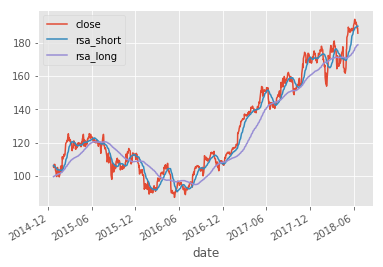

In [5]:
df = df[["close"]]
df["rsa_short"] = pd.Series.rolling(df["close"], window=sma_window_short).mean()
df["rsa_long"] = pd.Series.rolling(df["close"], window=sma_window_long).mean()
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)
df.plot()

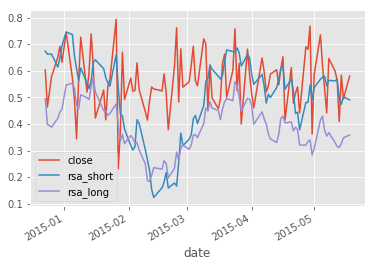

In [6]:
df = df - df.shift(-1)
df.dropna(inplace=True)
A=(df-df.min())/(df.max()-df.min())
A[:100].plot()

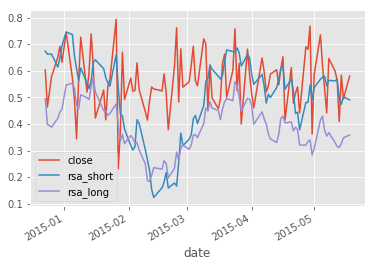

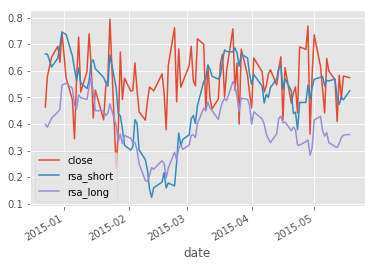

In [7]:
B=A.shift(-1)
A, B = A.dropna(), B.dropna()
A.drop(A.index[-1],inplace=True)
A[:100].plot()
plt.show()
B[:100].plot()
plt.show()

In [8]:
import numpy as np
A = A.values.reshape((A.shape[0], A.shape[1]))
B = B.values.reshape((B.shape[0], B.shape[1]))
A = np.array_split(A, num_batches)
B = np.array_split(B, num_batches)

# Model

In [9]:
import tensorflow as tf

In [10]:
lstm_size = 256
num_features = 3
learning_rate=0.05
layers = 5
iterations = 100
batch_size = 1

In [11]:
def rnn(size): 
    return tf.nn.rnn_cell.BasicRNNCell(size)
def multi(size, lay):
    return tf.nn.rnn_cell.MultiRNNCell([rnn(size) for _ in range(layers)])
with tf.name_scope("cell"):
    cell = multi(lstm_size, layers)
with tf.name_scope("output"):
    output = rnn(num_features)
X = tf.placeholder(tf.float32, [batch_size, None, num_features])
Y = tf.placeholder(tf.float32, [batch_size, None, num_features])
def compute_loss ():
    outputs1, state2 = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    outputs2, state2 = tf.nn.dynamic_rnn(output, outputs1, dtype=tf.float32)
    return tf.losses.mean_squared_error(Y, outputs2)

# Training

Finished backward pass №0, loss: 1.0223489999771118
Finished backward pass №1, loss: 1.2036418914794922
Finished backward pass №2, loss: 1.6949892044067383
Finished backward pass №3, loss: 1.6842741966247559
Finished backward pass №4, loss: 1.9161546230316162
Finished backward pass №5, loss: 1.699593186378479
Finished backward pass №6, loss: 1.6995253562927246
Finished backward pass №7, loss: 1.6990950107574463
Finished backward pass №8, loss: 1.697652816772461
Finished backward pass №9, loss: 1.6872198581695557
Finished backward pass №10, loss: 1.3363147974014282
Finished backward pass №11, loss: 1.3504745960235596
Finished backward pass №12, loss: 1.3504817485809326
Finished backward pass №13, loss: 1.3504810333251953
Finished backward pass №14, loss: 1.3504806756973267
Finished backward pass №15, loss: 1.3504799604415894
Finished backward pass №16, loss: 1.350479006767273
Finished backward pass №17, loss: 1.350477933883667
Finished backward pass №18, loss: 1.3504769802093506
Finishe

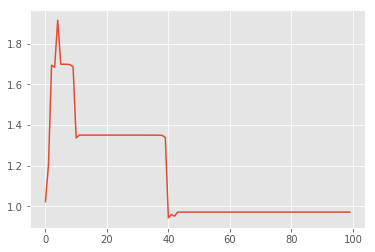

In [12]:
with tf.Session() as sess:
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(compute_loss())
    sess.run(tf.global_variables_initializer())
    losses = []
    for i in range(iterations):
        np.random.shuffle(A)
        np.random.shuffle(B)
        a = np.stack(A[:batch_size])
        b = np.stack(B[:batch_size])
        sess.run(optimizer, feed_dict={X:a,Y:b})
        loss = sess.run(compute_loss(), feed_dict={X:a, Y:b})
        print("Finished backward pass №{}, loss: {}".format(i, loss))
        losses.append(loss)
    plt.plot(losses)

# Add a Keras model for comparison (overfitting test)

In [15]:
import tensorflow.contrib.keras

In [16]:
# TODO: KERAS MODEL, TESTING, PREDICTION